# Introduction

This notebook demonstrates the step-by-step process of understanding and analyzing a dataset.

The notebook utilizes a dataset that contains various attributes of movies released on IMDB between 2006 and 2016. It applies exploratory data analysis (EDA) techniques to explore, clean, and visualize the dataset.

The steps in the notebook include the structural analysis of the dataset, handling missing data, identifying outliers, examining data distributions, and discovering relationships. Additionally, visualizations are employed to enhance the understanding of the dataset.

This EDA project can be a valuable resource for individuals looking to improve their data analysis skills. By following the analysis process and understanding the applied methods, one can gain further knowledge in the areas of data analysis and visualization.

# Import Python Libraries

In [1]:
import numpy as np 
# providing efficient manipulation of multidimensional arrays and matrices,
# as well as mathematical and statistical operations.

import pandas as pd 
# which is widely used for data manipulation, analysis, 
# and preprocessing tasks, offering powerful data structures and data analysis tools.

import matplotlib.pyplot as plt
# provides a wide range of functions and methods for creating various types of plots, 
# charts, and graphs to visually analyze and present data.

import seaborn as sns
# provides a high-level interface for creating attractive and informative statistical graphics, 
# making it easier to explore and understand patterns and relationships in the data.
# It offers a wide range of built-in plot types and customizable themes to enhance the visual appeal of the plots.

import plotly.express as px
# which is a high-level data visualization library. Plotly Express provides a simplified interface 
# for creating interactive and visually appealing plots, charts, and graphs. 
# It is built on top of the Plotly library and offers a wide range of chart types, 
# including scatter plots, line plots, bar charts, histograms, heatmaps, and more.
# With Plotly Express, you can easily create interactive plots 
#with features like zooming, hovering, and tooltips, allowing for in-depth exploration and analysis of your data.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# This code utilizes the os library to traverse the directory of datasets on Kaggle. 
#The os.walk() function iterates recursively through the specified directory, returning the filenames within each directory.
#By running the code, it prints the full paths of the datasets in the /kaggle/input directory. 
#It is a loop used to display the full paths and names of the datasets.

import warnings
warnings.filterwarnings("ignore")
# is used to suppress or ignore warning messages. This statement is used to prevent warning messages 
# from being printed or acted upon during the program's execution.
# This code snippet is used to disable or ignore warning messages, preventing them 
# from being displayed or processed during the program's execution.
# As a result, the program's output becomes cleaner and less noisy.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/imdb-data/IMDB-Movie-Data.csv


# About Data Set:
The "IMDB-Movie-Data" dataset, which includes the movies made between 2006-2016, will be used in the research. The dataset briefly includes the highest rated movies on IMDB by year. The following variables are included for each movie in the data set:

* Rank
* Title
* Genre
* Description
* Director
* Actors
* Year
* Runtime (Minutes)
* Rating
* Votes
* Revenue (Millions)
* Metascore

# Read Data

In [2]:
df_imdb = pd.read_csv("../input/imdb-data/IMDB-Movie-Data.csv")

In [3]:
df_imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
# sets the "Title" column of the "df_imdb" dataframe as the index, assuming that each row corresponds to a movie title.
df_imdb.set_index('Title', inplace=True)
df_imdb.head(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0


In [5]:
# number of rows and columns
df_imdb.shape
print("Number of rows:",df_imdb.shape[0])
print("Columns of number:",df_imdb.shape[1])

Number of rows: 1000
Columns of number: 11


In [6]:
# information about data
df_imdb.info() # information about data

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [7]:
# allows us to rename specific columns in the "df_imdb" dataframe to make them more concise or meaningful. 
# By providing more appropriate column names, we can enhance the readability and understanding of the data.
df_imdb.rename(columns={'Revenue (Millions)':"Revenue","Runtime (Minutes)":"Runtime"},inplace=True)
print(df_imdb.columns)

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')


In [8]:
# describe numerical basic statistics of data
df_imdb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Genre,1000,207,"Action,Adventure,Sci-Fi",50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1000,1000,A group of intergalactic criminals are forced ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Director,1000,644,Ridley Scott,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actors,1000,996,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,1000.0,NaN,NaN,NaN,2012.783,3.205962,2006.0,2010.0,2014.0,2016.0,2016.0
Runtime,1000.0,NaN,NaN,NaN,113.172,18.810908,66.0,100.0,111.0,123.0,191.0
Rating,1000.0,NaN,NaN,NaN,6.7232,0.945429,1.9,6.2,6.8,7.4,9.0
Votes,1000.0,NaN,NaN,NaN,169808.255,188762.647518,61.0,36309.0,110799.0,239909.75,1791916.0
Revenue,872.0,NaN,NaN,NaN,82.956376,103.25354,0.0,13.27,47.985,113.715,936.63


# Detection of Missing Values

In [9]:
# It helps in identifying the columns that have missing data and provides an overview of the extent of missing values 
# in each column.
import pandas as pd
missing_values = df_imdb.isnull().sum()
print(missing_values)

Rank             0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64


<AxesSubplot: >

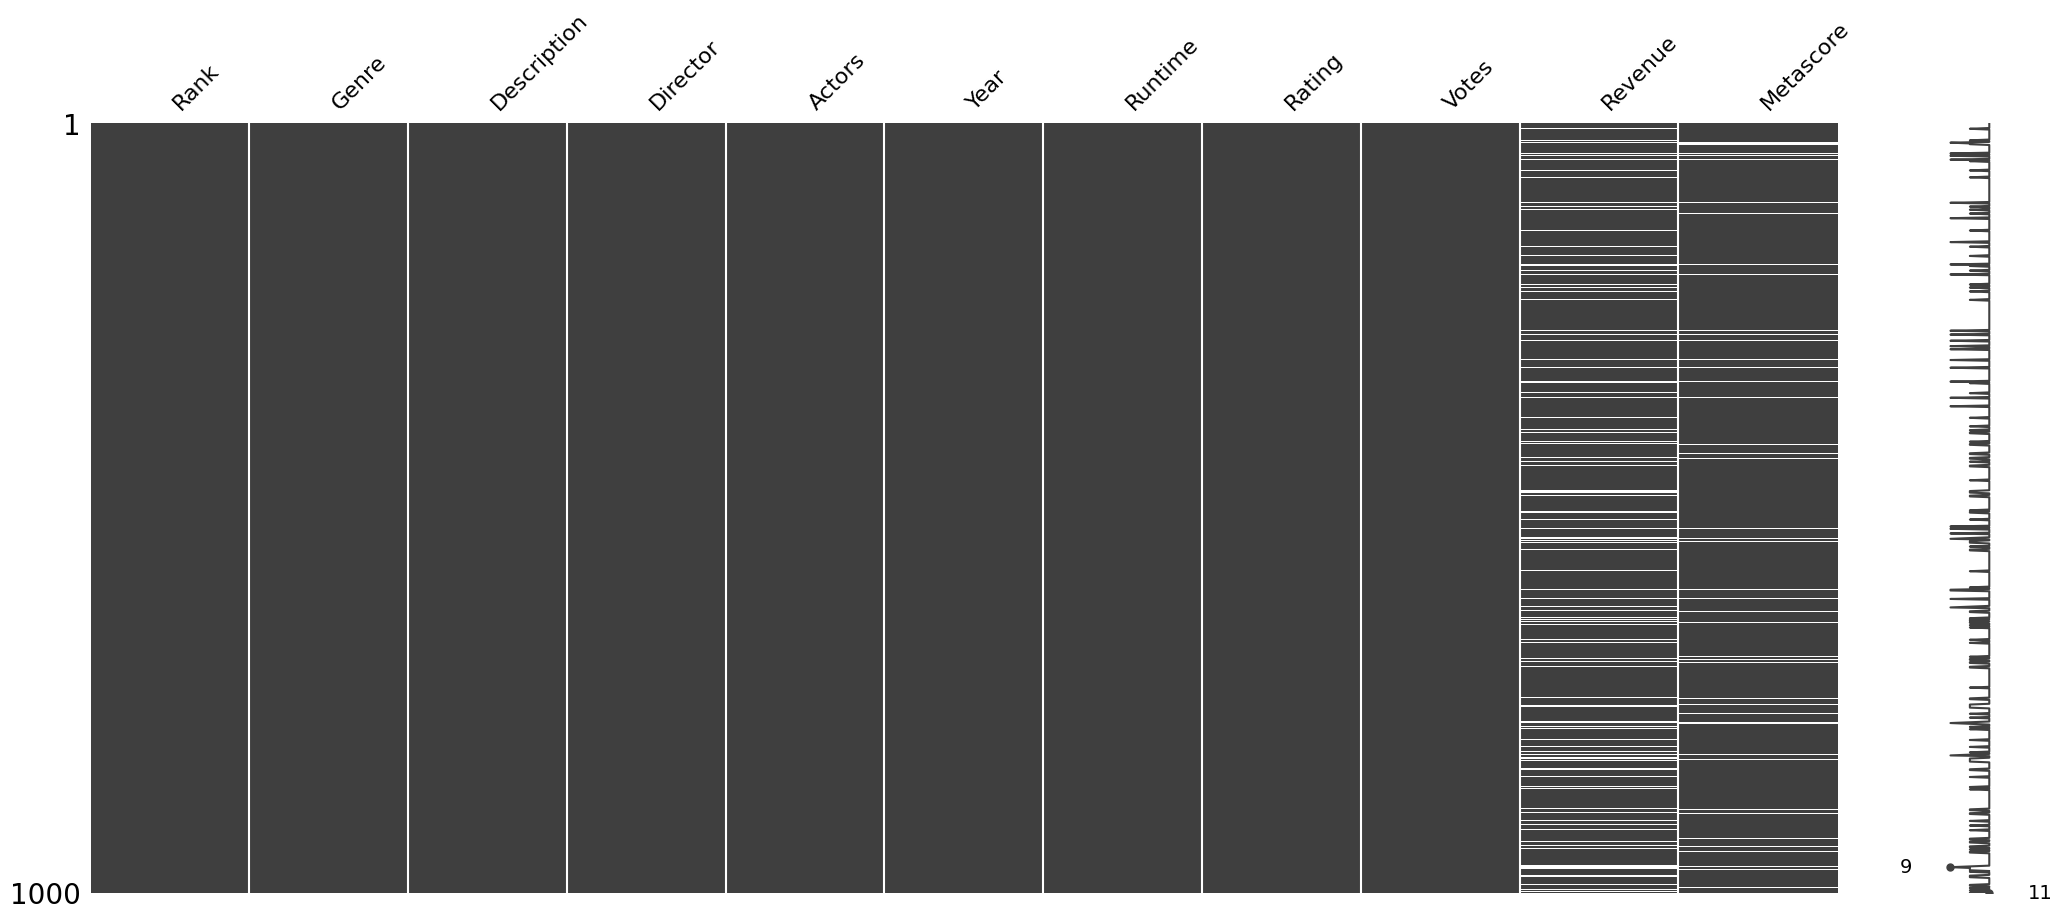

In [10]:
# this matrix provides a visual representation of the missing data pattern in the dataframe,
# helping to identify any patterns or correlations in the missing values across different columns.
import missingno as msno
msno.matrix(df_imdb)

In [11]:
# Fill missing values of Revenue column with average value
df_imdb['Revenue'].fillna(df_imdb['Revenue'].mean(), inplace=True)

# Check results
print(df_imdb['Revenue'])

Title
Guardians of the Galaxy    333.130000
Prometheus                 126.460000
Split                      138.120000
Sing                       270.320000
Suicide Squad              325.020000
                              ...    
Secret in Their Eyes        82.956376
Hostel: Part II             17.540000
Step Up 2: The Streets      58.010000
Search Party                82.956376
Nine Lives                  19.640000
Name: Revenue, Length: 1000, dtype: float64


In [12]:
# Remove observations with missing value in metascore column
df_imdb.dropna(subset=['Metascore'], inplace=True)

# Check results
print(df_imdb['Metascore'])

Title
Guardians of the Galaxy    76.0
Prometheus                 65.0
Split                      62.0
Sing                       59.0
Suicide Squad              40.0
                           ... 
Secret in Their Eyes       45.0
Hostel: Part II            46.0
Step Up 2: The Streets     50.0
Search Party               22.0
Nine Lives                 11.0
Name: Metascore, Length: 936, dtype: float64


In [13]:
# Check for missing values (pandas)
missing_values_2 = df_imdb.isnull().sum()
print(missing_values_2)

Rank           0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64


<AxesSubplot: >

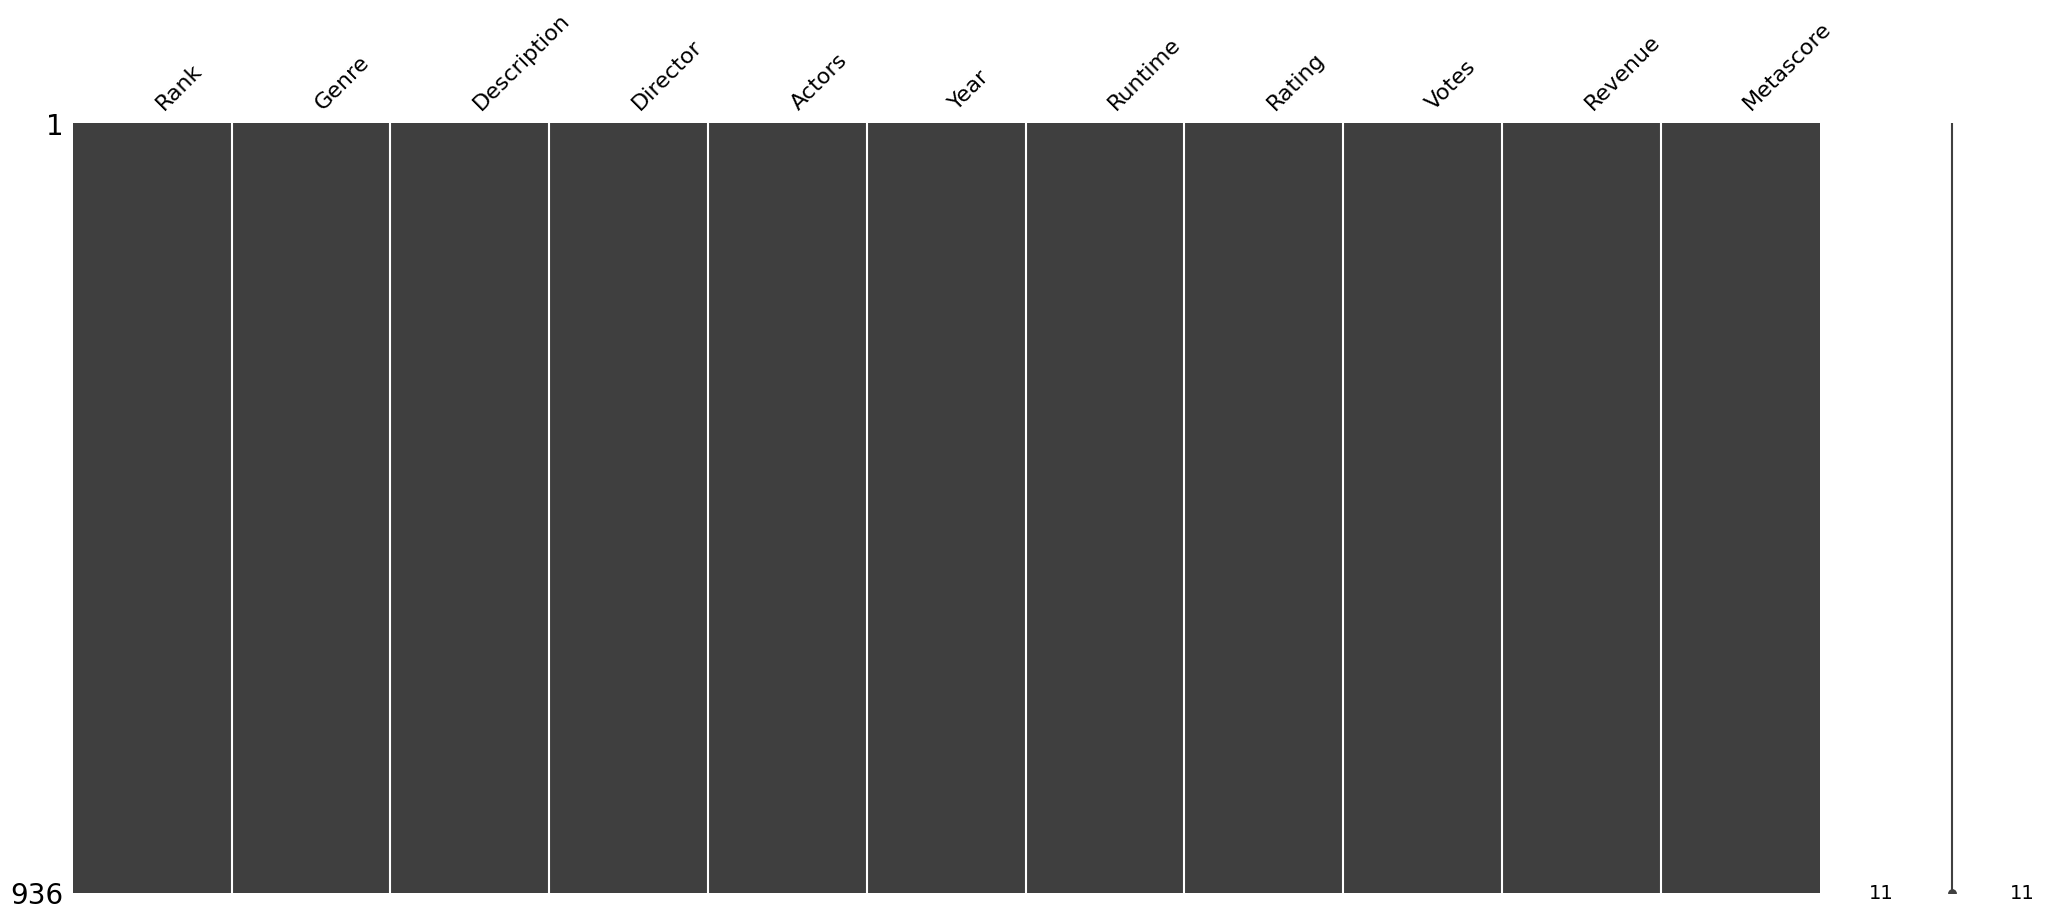

In [14]:
# Check for missing values (missingno)
msno.matrix(df_imdb)

# Exploring the Top-Rated 250 Films

In [15]:
# Sort data by Rating column and select dataset of top 250 movies
top250 = df_imdb.sort_values(by='Rating', ascending=False).head(250)

# save top250 dataset as CSV
top250.to_csv('top250.csv', index=False)

# Reload the saved CSV
df_top250 = pd.read_csv('top250.csv')

# Check results
print(df_top250)

     Rank                      Genre  \
0      55         Action,Crime,Drama   
1      81    Action,Adventure,Sci-Fi   
2      37     Adventure,Drama,Sci-Fi   
3     250     Biography,Comedy,Drama   
4      97    Animation,Drama,Fantasy   
..    ...                        ...   
245    67     Drama,History,Thriller   
246    58              Drama,Romance   
247   234  Action,Adventure,Thriller   
248   444              Drama,Romance   
249   698       Drama,Romance,Sci-Fi   

                                           Description               Director  \
0    When the menace known as the Joker wreaks havo...      Christopher Nolan   
1    A thief, who steals corporate secrets through ...      Christopher Nolan   
2    A team of explorers travel through a wormhole ...      Christopher Nolan   
3    After he becomes a quadriplegic from a paragli...        Olivier Nakache   
4    Two strangers find themselves linked in a biza...         Makoto Shinkai   
..                               

# Exploring the Dimensions of the Dataset: Size and Structure Analysis - Top 250 Films

In [16]:
# Reload the saved CSV
df_top250 = pd.read_csv('top250.csv')
# number of rows and columns
num_rows, num_columns = df_top250.shape
print("Number of rows:", num_rows)

Number of rows: 250


In [17]:
df_top250.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
1,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
2,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
3,250,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
4,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0


In [18]:
# Display 10 observations randomly
random_10 = df_top250.sample(n=10, random_state=42)

# Print results
print(random_10)

     Rank                       Genre  \
142   484                Comedy,Drama   
6     100        Crime,Drama,Thriller   
97    337        Comedy,Drama,Romance   
60    174        Drama,Romance,Sci-Fi   
112   511                   Drama,War   
181   673      Drama,History,Thriller   
197    11    Adventure,Family,Fantasy   
184   712           Animation,Fantasy   
9     992          Drama,Family,Music   
104   564  Animation,Adventure,Comedy   

                                           Description              Director  \
142  Seven long-time friends get together for a din...        Paolo Genovese   
6    An undercover cop and a mole in the police att...       Martin Scorsese   
97   After a stint in a mental institution, former ...      David O. Russell   
60   A lonely writer develops an unlikely relations...           Spike Jonze   
112  Set during WWII, a story seen through the inno...           Mark Herman   
181  During the Iraq War, a Sergeant recently assig...       Kathryn

In [19]:
print(df_top250.columns)

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')


In [20]:
# View summary statistics
special_statistics = df_top250.describe()

# Print results
print(special_statistics)

             Rank         Year     Runtime      Rating         Votes  \
count  250.000000   250.000000  250.000000  250.000000  2.500000e+02   
mean   393.252000  2011.932000  123.492000    7.802400  3.247748e+05   
std    276.710882     3.326807   21.438104    0.309155  2.587620e+05   
min      1.000000  2006.000000   66.000000    7.300000  6.100000e+01   
25%    150.250000  2009.000000  107.000000    7.500000  1.373042e+05   
50%    338.000000  2012.000000  120.500000    7.800000  2.925945e+05   
75%    631.250000  2015.000000  137.000000    8.000000  4.500248e+05   
max    992.000000  2016.000000  187.000000    9.000000  1.791916e+06   

          Revenue   Metascore  
count  250.000000  250.000000  
mean   116.814244   73.500000  
std    136.843242   12.244907  
min      0.010000   34.000000  
25%     19.292500   67.000000  
50%     73.580000   74.000000  
75%    168.887500   81.000000  
max    936.630000  100.000000  


# Checking Data Accuracy and Missing Values in the 'top250.csv

In [21]:
# Check the accuracy of the data
accuracy_check = df_top250.dtypes

# Check for missing values
missing_value_check = df_top250.isnull().sum()

# Print results
print("Accuracy of data:\n", accuracy_check)
print("\nChecking for missing values:\n", missing_value_check)

Accuracy of data:
 Rank             int64
Genre           object
Description     object
Director        object
Actors          object
Year             int64
Runtime          int64
Rating         float64
Votes            int64
Revenue        float64
Metascore      float64
dtype: object

Checking for missing values:
 Rank           0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64


# Data Visualization of Top 250 Movies

In [22]:
# Calculate the count of movies by year
df_top250['Year'].value_counts()

2016    54
2014    29
2009    21
2013    21
2011    20
2007    20
2012    19
2015    19
2010    18
2006    17
2008    12
Name: Year, dtype: int64

# Top 250 Movies by year

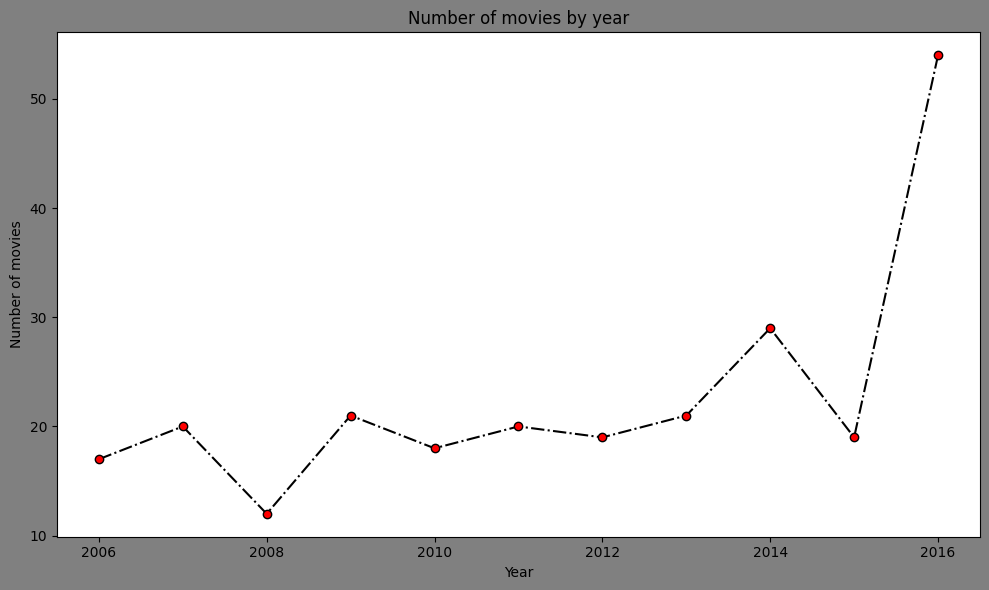

In [23]:
# MATPLOTLIB
# Calculate the number of movies by year with MATPLOTLIB
movie_num = df_top250['Year'].value_counts().sort_index()

# Draw line chart
plt.figure(facecolor="gray", figsize=(10, 6))
plt.plot(movie_num.index, movie_num.values, marker='o', markerfacecolor="red", linestyle='dashdot', color="black")

# Add chart title and axis labels
plt.title('Number of movies by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

# Show the chart
plt.tight_layout()
plt.show()

**Main Findings or Trends of the Image: The chart displays the number of movies by year in the top 250 dataset. There is a significant increase in the number of movies from the early years to the later years. The highest number of movies in the top 250 list is observed in recent years.**

**Image Interpretation or Related Data Analysis: The top 250 movies represent a selection of highly rated and popular films. The chart indicates that recent years have produced a considerable number of movies that have gained recognition and acclaim. This trend suggests a vibrant and evolving film industry, with a continuous production of noteworthy films that have resonated with audiences and critics alike.**

In [24]:
df_top250.Genre.value_counts()

Action,Adventure,Sci-Fi       13
Animation,Adventure,Comedy    12
Drama                         12
Comedy,Drama                  11
Crime,Drama,Mystery            9
                              ..
Drama,War                      1
Comedy,Drama,Fantasy           1
Biography,Drama,Mystery        1
Action,Comedy                  1
Action,Comedy,Crime            1
Name: Genre, Length: 97, dtype: int64

In [25]:
# Split the "Genre" column by bracket and create new columns
df_genres = df_top250["Genre"].str.split(",")
# explode method puts each type on a separate line
df_genres = df_genres.explode()
# Checking the updated "Genre" column
df_genres.value_counts()

Drama        175
Adventure     70
Comedy        58
Action        54
Thriller      38
Biography     36
Crime         34
Sci-Fi        30
Mystery       30
Romance       29
Fantasy       28
Animation     24
History       14
Family        12
Horror         8
War            7
Sport          7
Music          6
Musical        3
Western        2
Name: Genre, dtype: int64

# Top 10 Movies  Genres

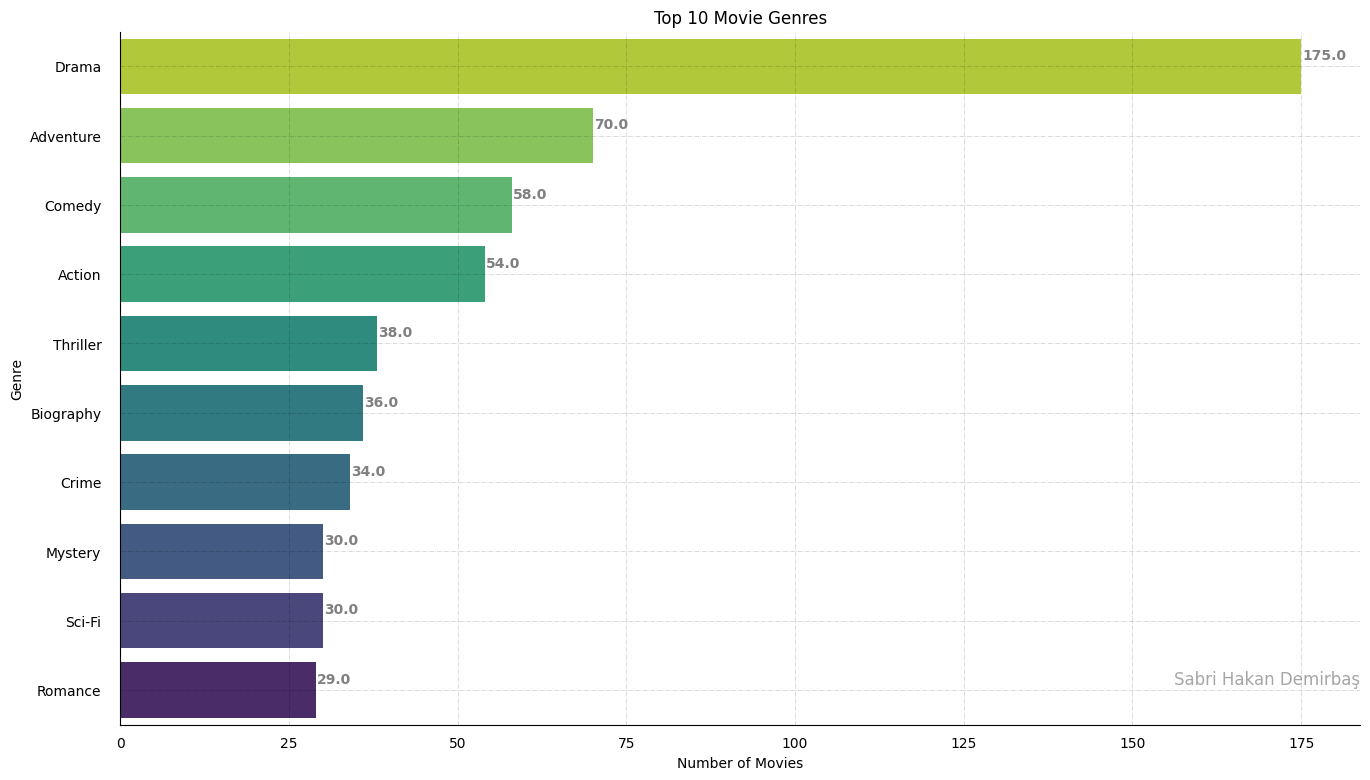

In [26]:
# SEABORN
# Select the 'Genre' column and count the occurrences of each genre
top_ten_movie_genre = df_genres.value_counts().head(10).sort_values(ascending=True)

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(16, 9))

# Create a horizontal bar plot
ax = sns.barplot(x=top_ten_movie_genre.values, y=top_ten_movie_genre.index, palette='viridis')

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
ax.grid(color='black', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.invert_yaxis()

# Add value annotations to the bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')

# Add chart title and axis labels
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Add watermark
fig.text(0.9, 0.15, 'Sabri Hakan Demirbaş', fontsize=12, color='grey', ha='right', va='bottom', alpha=0.7)

# Show the plot
plt.show()

**Main Findings or Trends of the Image: The updated chart for the top 250 movies dataset reveals that the most filmed genre remains "Drama", followed by "Crime" and "Action". The distribution of genres within the top 250 movies is relatively consistent with the previous analysis, indicating a continued preference for these genres among both filmmakers and audiences.**

**Image Interpretation or Related Data Analysis: The dominance of drama, crime, and action genres in the top 250 movies suggests that these genres have consistently produced critically acclaimed and popular films. This finding aligns with the notion that these genres have a wide appeal and can attract a significant audience. Filmmakers may continue to focus on producing films within these genres due to their proven success and audience demand.**

# Distribution of Number of Movies by Movie Genre

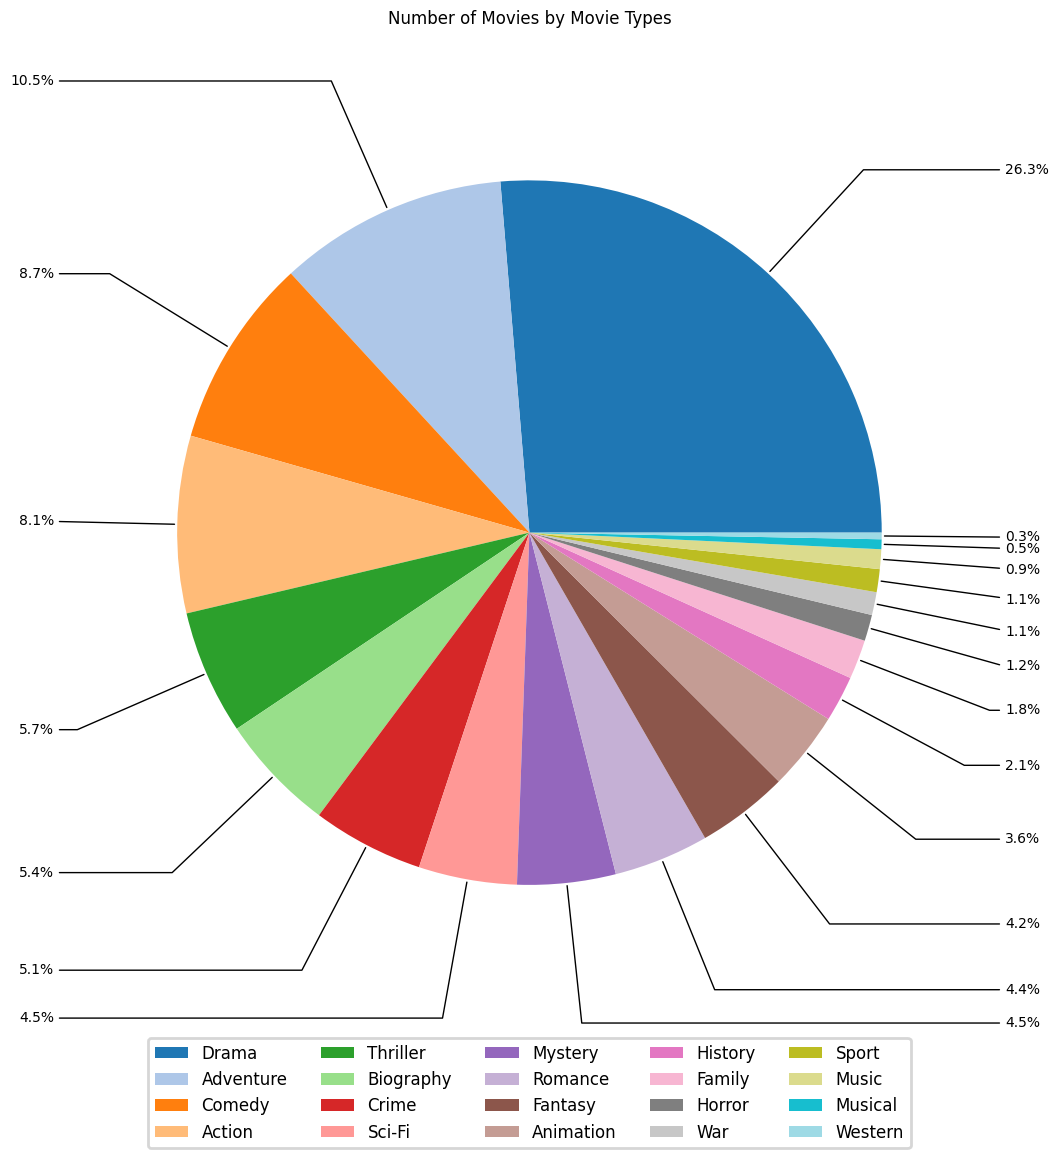

In [27]:
#MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Prepare data for pie chart
genre_counts = df_genres.value_counts()
labels = genre_counts.index
sizes = genre_counts.values

# Create unique color list for colors
colors = cm.tab20(np.linspace(0, 1, len(labels)))

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(sizes, labels=None,
                       rotatelabels=45, startangle=0, colors=colors
                       )

# Calculate percentiles
total = sum(sizes)
percentages = [f'{(size/total)*100:.1f}%' for size in sizes]

# Add percentiles inside and outside of slices
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="gray", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va='center')
for i, p in enumerate(wedges):
    angle = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(percentages[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# Add the Legend to the bottom in the horizontal plane
legend = ax.legend(wedges, labels, loc='lower center', bbox_to_anchor=(0.5, -0.31), ncol=5, fontsize=12)

# Increase Legend size
legend.get_frame().set_linewidth(2)

# Display the pie chart in a circular fashion
plt.axis('equal')

plt.title('Number of Movies by Movie Types', y=1.15)

# Show chart
plt.show()


**Main Findings or Trends of the Image: The pie chart represents the distribution of movie genres within the top 250 movies dataset. The most prevalent genre among the top 250 movies is "Drama", followed by "Adventure" and "Comedy". Other genres have a relatively smaller presence.**

**Image Interpretation or Related Data Analysis: The pie chart provides insights into the popularity of different movie genres within the top 250 movies. It highlights that drama is the most dominant genre among highly-rated movies, indicating its appeal to a wide audience. The presence of adventure and comedy genres also suggests the significance of entertainment and thrilling elements in successful movies.**

In [28]:
# PLOTLY
import plotly.graph_objects as go

# Prepare data for pie chart
genre_counts = df_genres.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Create unique color list for colors
colors = px.colors.qualitative.Set3[:20]

# Draw the pie chart
fig = go.Figure(data=[go.Pie(labels=genre_counts['Genre'],
                             values=genre_counts['Count'],
                             marker=dict(colors=colors),
                             hovertemplate='<b>%{label}</b><br>%{percent:.1%}',
                             textinfo='label+percent'
                             )])

fig.update_layout(height=950, width=950,
                  title='Number of Movies by Movie Types', title_x=0.5,
                  showlegend=False)

fig.update_traces(hovertemplate='<b>%{label}</b><br>Number of Movies: %{value}')

# Show pie chart
fig.show()

**Main Findings or Trends of the Image: The visual represents the distribution of movie genres within the top 250 movies dataset. The genre with the highest number of movies in the top 250 is "Drama", followed by "Adventure" and "Comedy". Other genres have a relatively smaller representation.**

**Image Interpretation or Related Data Analysis: The pie chart provides insights into the popularity of different movie genres within the top 250 movies. It indicates that drama movies dominate the top 250 list, suggesting their strong appeal and critical acclaim. Adventure and comedy genres also have a significant presence among the top-rated movies. This data highlights the preferences of audiences for these genres and the recognition they receive in the film industry.**

# Visualizing Relationships - Correlation

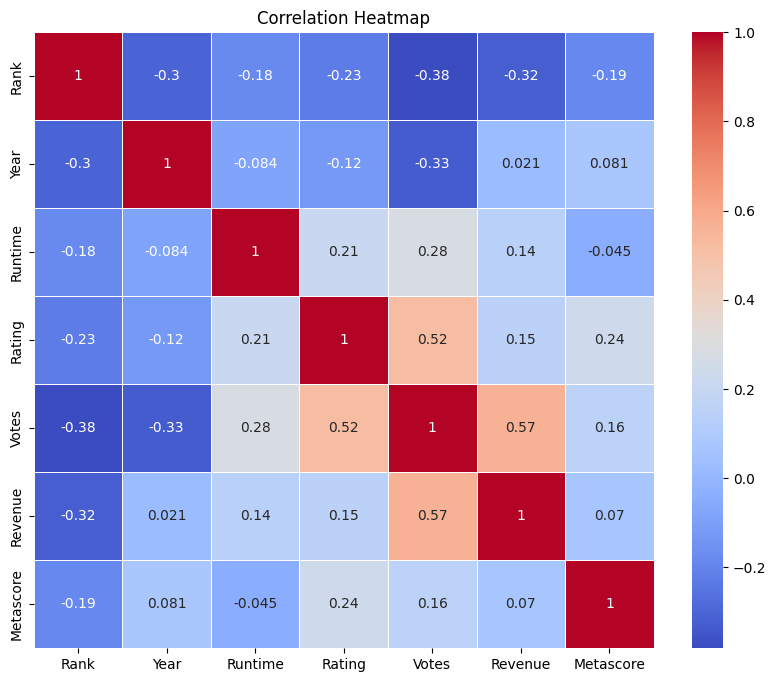

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of numeric variables
numeric_df = df_top250.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap drawing
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Main Findings or Trends of the Image: The image shows the relationship and correlation between the numerical variables in the top 250 movies dataset. The heatmap visualizes the positive and negative correlations between the variables using a color scale. Dark blue color represents negative correlation, while red color represents positive correlation. Darker colors indicate stronger correlation.**

**Visual Interpretation or Related Data Analysis: The heatmap reveals interesting insights about the relationships between numerical variables in the top 250 movies dataset. For instance, there seems to be a positive correlation between "Votes" (number of votes) and "Gross_Earnings_Millions" (revenue), indicating that movies with higher ratings tend to have higher earnings. Additionally, correlations can be observed between "Metascore" (critic score) and other variables. The heatmap provides a useful tool for understanding and analyzing the interrelationships among variables in the dataset.**

# Top 20 Actors by Number of Movies

In [30]:
# Separates movie genres by command
actors = df_top250['Actors'].str.split(',')

# Remove spaces before or after the name
actors = actors.apply(lambda x: [i.strip() for i in x])

# Explode method puts each actor on a separate line
actors = actors.explode()

# Top 20 actors according to the number of movies they starred in
actors.value_counts().head(20)

Robert Downey Jr.       8
Brad Pitt               8
Rachel McAdams          7
Leonardo DiCaprio       7
Jake Gyllenhaal         7
Jeremy Renner           6
Tom Hanks               6
Ryan Gosling            6
Hugh Jackman            5
Mark Ruffalo            5
Emma Watson             5
Domhnall Gleeson        5
Ian McKellen            5
Steve Carell            5
Scarlett Johansson      5
Christian Bale          5
Joseph Gordon-Levitt    5
Martin Freeman          4
Emma Stone              4
Matthew McConaughey     4
Name: Actors, dtype: int64

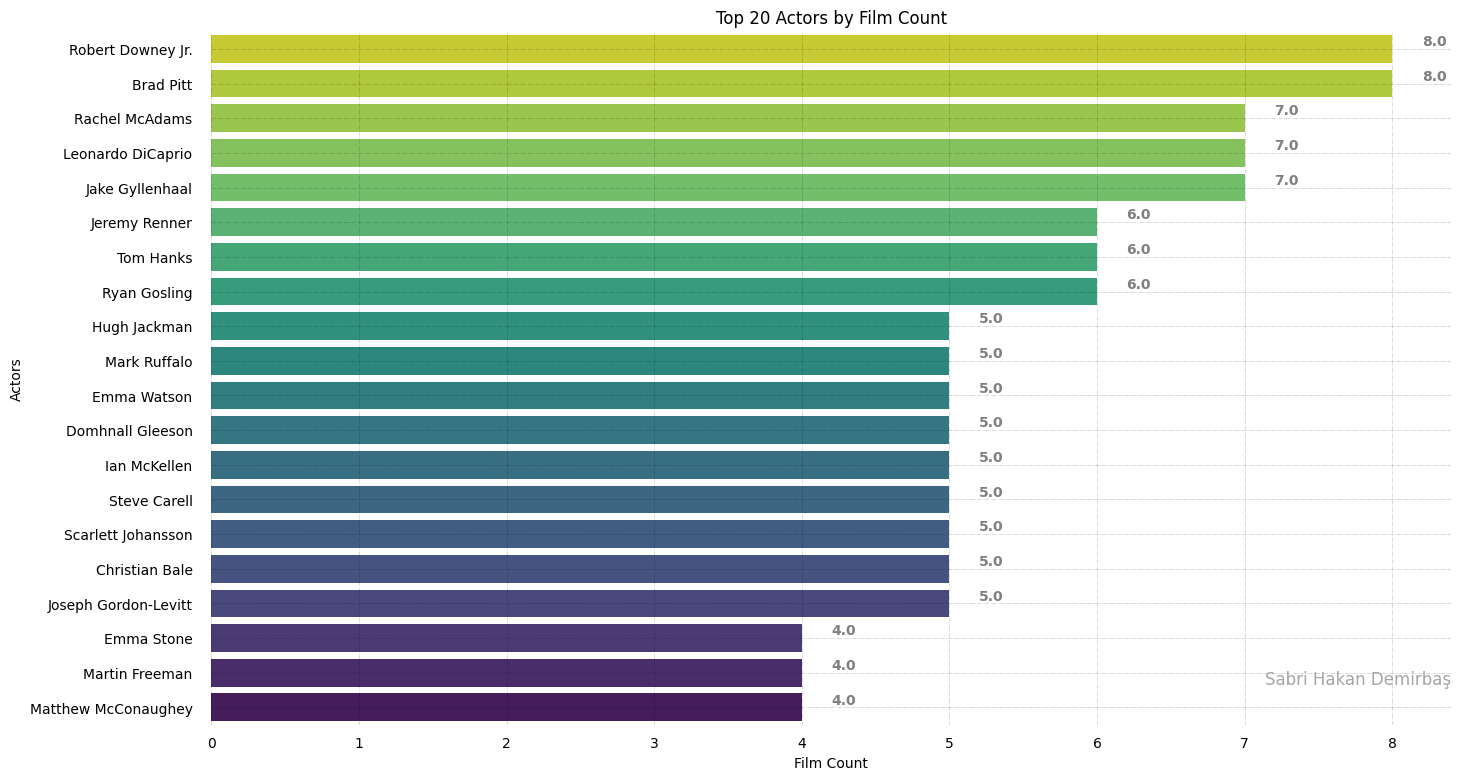

In [31]:
#SEABORN
# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

# Horizontal Bar Plot
ax = sns.barplot(x=actors.value_counts().head(20).sort_values(ascending=True).values,
                 y=actors.value_counts().head(20).sort_values(ascending=True).index,
                 data=df_top250, palette='viridis')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(color='black', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

# Add chart title and axis labels
plt.xlabel('Film Count')
plt.ylabel('Actors')
plt.title('Top 20 Actors by Film Count')

# Add Text watermark
fig.text(0.9, 0.15, 'Sabri Hakan Demirbaş', fontsize=12,
         color='grey', ha='right', va='bottom',
         alpha=0.7)

# Show Plot
plt.show()

**Main Findings or Trends of the Image: The image displays the ranking of actors in the top 250 movies dataset based on the number of movies they have appeared in. It showcases the actors who have been involved in the highest number of movies among the top 250.**

**Image Interpretation or Related Data Analysis: The horizontal bar graph presents the ranking of actors in the top 250 movies dataset by movie count. It provides insights into the actors who have had the most prolific careers and have been part of a significant number of critically acclaimed movies. For instance, "Robert Downey Jr." emerges as the actor with the most appearances in the top 250 movies. This visualization offers valuable information about the prominence and impact of actors in the highly regarded films within the dataset.**

# Positive Relationship Between Rating and Revenue: Top 250 Popular Movies

In [32]:
# we get the title column with reset_index to see the movie names in the bubble chart 

df_top250.reset_index(inplace = True)

In [33]:
import plotly.express as px
# PLOTLY
# Create the bubble chart
fig = px.scatter(df_top250, x='Rating', y='Revenue', size='Rating', color='Rating',
                 hover_name='Genre', log_x=True, log_y=True, size_max=50, trendline="ols",
                 labels={'Rating': 'Rating', 'Revenue': 'Revenue (Million Dollars)'},
                 title='Rating and Revenue of Top 250 Popular Movies')

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Revenue (Million Dollars)'),
    coloraxis_colorbar=dict(title='Rating'),
    showlegend=False
)

# Show the bubble chart
fig.show()

**Main Findings or Trends of the Image: The image shows the rating points and revenues of the 250 most popular movies. Each dot represents a movie, and the size of the dots is used as an indicator of the rating score, and the colors are used as an indicator of the rating score. In addition, revenue information is given on the image.**

**Image Interpretation or Related Data Analysis: Bubble chart visualizes the 250 most popular movies in the IMDB-Movie-Data.csv dataset according to their rating points and revenues. This image can be used to assess the popularity and commercial success of movies. While the size of the dots reflects the rating score of the movies, the color scale shows the differences in these scores. Also, the movie name is mentioned above each dot. This image can be used to monitor the revenue performance of movies according to their rating points. For example, it can be observed that films with higher rating points generally earn higher revenues.**

# Rating and Votes Distribution Analysis of Top 250 Movies

In [34]:
# PLOTLY
# Create scatter plot for rating and vote
fig = px.scatter(df_top250, x='Rating', y='Votes', color='Rating',
                 trendline="ols",
                 labels={'Rating': 'Rating', 'Votes': 'Votes'},
                 title='Distribution Analysis of Rating and Votes')

# Customize the layout
fig.update_layout(
    xaxis=dict(title='Rating'),
    yaxis=dict(title='Votes'),
    showlegend=False
)

# Show the scatter plot
fig.show()

**Main Findings or Trends of the Image:
The image depicts the rating points and revenues of the top 250 most popular movies. Each dot represents a movie, with the size of the dots indicating the rating score and the colors representing the rating score as well. Additionally, revenue information is provided within the image.**

**Image Interpretation or Related Data Analysis:
The bubble chart visualizes the top 250 movies in the IMDB-Movie-Data.csv dataset based on their rating points and revenues. This image enables an assessment of the movies' popularity and commercial success. The dot sizes correspond to the rating scores, while the color scale highlights the variations in these scores. Each dot is labeled with the movie name.**

**The image serves as a tool to analyze the revenue performance of movies relative to their rating points. Notably, movies with higher rating points tend to generate higher revenues. This visualization provides valuable insights into the relationship between ratings and revenues, showcasing how highly-rated movies often have greater financial success.**

# Genre-wise Revenue Analysis: Exploring the Top Earning Movie Genres

In [35]:
# Split the "Genre" column by comma and create new columns
df_genres = df_top250["Genre"].str.split(",")
# Use the explode method to put each genre on a separate row
df_genres = df_genres.explode()

# Merge the Genre and Revenue columns
df_genre_revenue = pd.concat([df_genres, df_top250['Revenue']], axis=1)

# Select the records with the highest Revenue for each Genre
df_genre_revenue_max = df_genre_revenue.groupby('Genre')['Revenue'].max().reset_index()

# Sort the data by Revenue in descending order
df_genre_revenue_max = df_genre_revenue_max.sort_values('Revenue', ascending=False)

# Plot the graph
fig = px.bar(df_genre_revenue_max, x='Genre', y='Revenue', title='Highest Revenue by Genre')
fig.update_xaxes(title='Genre')
fig.update_yaxes(title='Revenue (Million Dollars)')

# Show the graph
fig.show()

**Main Findings or Trends of the Image: The bar chart represents the highest revenue achieved by movies in each genre. Each bar corresponds to a specific genre, while the height of the bars indicates the revenue amount in millions of dollars.

**Image Interpretation or Related Data Analysis: The bar chart provides insights into the revenue performance of different movie genres. It allows us to compare the revenue levels across genres and identify the genres that have generated the highest revenues. The chart reveals that certain genres, such as Action, Adventure, and Fantasy, have consistently generated high revenues, while others, like Animation and Biography, have relatively lower revenue levels.**

**The visualization helps in understanding the revenue potential of different genres in the movie industry. It suggests that genres with a strong appeal to a wide audience and a higher potential for commercial success tend to generate higher revenues. Filmmakers and investors can utilize this information to make informed decisions regarding genre selection and investment opportunities.**

**Overall, the bar chart provides a clear overview of the highest revenue achieved by movies in each genre, allowing for quick comparison and identification of genres with strong revenue potential.**

# Rank vs Rating: Exploring the Relationship between Movie Rank and Rating

In [36]:
# PLOTLY
# Create the scatter plot
fig = px.scatter(df_top250, x='Rank', y='Rating', title='Rank vs Rating', trendline="ols",
                 labels={'Rank': 'Rank', 'Rating': 'Rating'})
fig.update_layout(xaxis=dict(title='Rank'), yaxis=dict(title='Rating'))
# Show the plot
fig.show()

**Main Findings or Trends of the Image: The bar chart illustrates the highest revenue generated by movies in various genres. Each bar represents a specific genre, and the height of the bars indicates the revenue amount in millions of dollars.**

**Image Interpretation or Related Data Analysis: The bar chart provides valuable insights into the revenue performance of different movie genres. By comparing the revenue levels across genres, we can identify the genres that have consistently achieved high revenues and those that have relatively lower revenue levels. The chart highlights that genres like Action, Adventure, and Fantasy have consistently generated substantial revenues, while genres such as Animation and Biography have comparatively lower revenue levels.**

**The visualization allows us to understand the revenue potential associated with different genres in the movie industry. It suggests that genres with broad audience appeal and a higher potential for commercial success tend to generate higher revenues. Filmmakers and investors can leverage this information to make informed decisions when selecting genres and identifying investment opportunities.**

**Overall, the bar chart offers a clear and concise overview of the highest revenue achieved by movies in each genre, facilitating quick comparisons and the identification of genres with significant revenue potential.**

In [37]:
correlation = df_top250['Rank'].corr(df_top250['Rating'])
print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: -0.22539022943809556


# Rank vs Metascore: Exploring the Relationship between Movie Rank and Metascore

In [38]:
# PLOTLY
# Create the scatter plot
fig = px.scatter(df_top250, x="Rank", y="Metascore", title="Rank vs Metascore",trendline="ols",
                 labels={"Rank": "Rank", "Metascore": "Metascore"})

# Show the plot
fig.show()

**Main Findings or Trends of the Image: The scatter plot showcases the relationship between the "Rank" and "Metascore" variables for the top 250 movies. Each data point on the plot represents a specific movie, with the x-axis representing the movie's rank and the y-axis representing its Metascore.**

**Image Interpretation or Related Data Analysis: The scatter plot allows us to visually examine the relationship between the movie's rank and its Metascore. The trendline, represented by the line of best fit, provides an indication of the overall trend in the data points. In this case, the negative slope of the trendline suggests a negative correlation between the movie's rank and its Metascore. This implies that, on average, movies with higher ranks tend to have lower Metascores, and vice versa.**

**However, it's important to note that the relationship between rank and Metascore is not a perfect one. There is still some variability in the data points around the trendline, indicating that other factors may influence a movie's rank and Metascore. Factors such as genre, director, and audience preferences can also play a significant role in determining a movie's critical reception.**

**The scatter plot with the trendline offers insights into the relationship between the movie's rank and its Metascore. It suggests that there is a negative correlation between these variables, indicating that movies with higher ranks may have lower Metascores. This information can be valuable for understanding the critical reception of movies and evaluating their overall ranking.**

**Overall, the scatter plot with the trendline provides a visual representation of the relationship between the movie's rank and its Metascore. It highlights a negative correlation between these variables, suggesting that movies with higher ranks may have lower Metascores on average.**

# Relationship between Runtime and Revenue in Top 250 Movies

In [39]:
# PLOTLY
#Create a scatter plot with bubble markers
fig = px.scatter(df_top250, x="Runtime", y="Revenue", size="Rating",
                 title="Runtime vs Revenue - Top 250 Movies",
                 trendline="ols")

# Customize the appearance of the scatter plot
fig.update_traces(marker=dict(color='rgb(31, 119, 180)', line=dict(width=0.5, color='rgb(8, 48, 107)')),
                  selector=dict(mode='markers'))

# Customize the trendline appearance
fig.update_traces(line=dict(color='rgb(214, 39, 40)', width=3, dash='dash'),
                  selector=dict(name='trendline'))

# Customize the layout
fig.update_layout(
    title=dict(font=dict(size=24)),
    xaxis=dict(title='Runtime', showgrid=False, showline=True, linecolor='gray',
               mirror=True, ticks='outside', tickfont=dict(size=12)),
    yaxis=dict(title='Revenue', showgrid=False, showline=True, linecolor='gray',
               mirror=True, ticks='outside', tickfont=dict(size=12)),
    plot_bgcolor='white'
)

# Show the plot
fig.show()

**Main Findings or Trends of the Image: The scatter plot with a trendline represents the relationship between movie runtime (in minutes) and revenue (in millions of dollars). Each data point on the plot corresponds to a specific movie, with the x-axis representing the movie's runtime and the y-axis representing its revenue.**

**Image Interpretation or Related Data Analysis: The scatter plot with a trendline allows us to examine the relationship between movie runtime and revenue. The trendline, which is a line of best fit, provides an indication of the overall trend in the data points. In this case, the positive slope of the trendline suggests a positive correlation between runtime and revenue. This means that, on average, movies with longer runtimes tend to generate higher revenues.**

**However, it's important to note that the relationship between runtime and revenue is not a perfect one. There is still some variability in the data points around the trendline, indicating that other factors may also influence a movie's revenue. Factors such as genre, marketing, release date, and critical reception can also play a significant role in a movie's financial success.**

**The scatter plot with a trendline offers valuable insights for movie producers and distributors. It suggests that longer runtimes might be associated with higher revenue potential, but it's not a guarantee of success. Filmmakers need to consider a variety of factors when determining the optimal runtime for their movies, including storytelling, pacing, and audience preferences.**

**Overall, the scatter plot with a trendline provides a visual representation of the relationship between runtime and revenue. It highlights a positive correlation between these variables, indicating that movies with longer runtimes have the potential to generate higher revenues.**

# Relationship between Runtime and Rating in Top 250 Movies

In [40]:
# PLOTLY
# Create a scatter plot with bubble markers
fig = px.scatter(df_top250, x="Runtime", y="Rating", size="Revenue",
                 title="Runtime vs Rating - Top 250 Movies",
                 trendline="ols")

# Customize the appearance of the scatter plot
fig.update_traces(marker=dict(color='rgb(31, 119, 180)', line=dict(width=0.5, color='rgb(8, 48, 107)')),
                  selector=dict(mode='markers'))

# Customize the trendline appearance
fig.update_traces(line=dict(color='rgb(214, 39, 40)', width=3, dash='dash'),
                  selector=dict(name='trendline'))

# Customize the layout
fig.update_layout(
    title=dict(font=dict(size=24)),
    xaxis=dict(title='Runtime', showgrid=False, showline=True, linecolor='gray',
               mirror=True, ticks='outside', tickfont=dict(size=12)),
    yaxis=dict(title='Rating', showgrid=False, showline=True, linecolor='gray',
               mirror=True, ticks='outside', tickfont=dict(size=12)),
    plot_bgcolor='white'
)

# Show the plot
fig.show()

**Image Interpretation or Related Data Analysis: The scatter plot with a trendline allows us to examine the relationship between movie runtime and revenue. The trendline, representing the line of best fit, provides an indication of the overall trend observed in the data points. In this case, the positive slope of the trendline suggests a positive correlation between runtime and revenue. This implies that, on average, movies with longer runtimes tend to generate higher revenues.**

**However, it's important to acknowledge that the relationship between runtime and revenue is not perfect. There is still some variability in the data points around the trendline, indicating that other factors may also influence a movie's revenue. Genre, marketing efforts, release date, and critical reception are examples of additional factors that can significantly impact a movie's financial success.**

**The scatter plot with a trendline offers valuable insights for movie producers and distributors. It suggests that longer runtimes might be associated with higher revenue potential, but it does not guarantee success on its own. Filmmakers need to consider a range of factors when determining the optimal runtime for their movies, including
factors such as storytelling, pacing, and audience preferences.**

**Overall, the scatter plot with a trendline provides a visual representation of the relationship between runtime and revenue. It highlights a positive correlation between these variables, suggesting that movies with longer runtimes have the potential to generate higher revenues. However, it is crucial to consider other influential factors in conjunction with runtime to maximize a movie's financial success.**